In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['axes.labelsize']        = 12
plt.rcParams['axes.titlesize']        = 12
plt.rcParams['xtick.labelsize']       = 12
plt.rcParams['ytick.labelsize']       = 12
plt.rcParams['font.size']             = 12

In [2]:
k_edges = np.load('aemulus_data/k_edges.npy')[:350]
k_midpoints = k = (k_edges[:-1] + k_edges[1:]) / 2
p_hh = np.load('aemulus_data/p_gg_lcdm.npy')[:349].real
p_hm = np.load('aemulus_data/p_gm_lcdm.npy')[:349].real

In [3]:
# cubic fits: b1, b2, bs, bk2, b3, sn = 1.3614511, 1.1889933, -0.827219, 0.17029928, -0.36689878, -60.454693  
pgg_cubic = np.loadtxt('aemulus_data/pgg_cubic.txt')
pgm_cubic = np.loadtxt('aemulus_data/pgm_cubic.txt')

# quadratic fits: b1, b2, bs, bk2, sn = 1.3460631, 1.248588, -0.8686432, -0.4522192, 228.6756
pgg_quad = np.loadtxt('aemulus_data/pgg_quad.txt')
pgm_quad = np.loadtxt('aemulus_data/pgm_quad.txt')

# linear fits: b1, sn = 1.332237, 2.1605183e+03
pgg_lin = np.loadtxt('aemulus_data/pgg_lin.txt')
pgm_lin = np.loadtxt('aemulus_data/pgm_lin.txt')

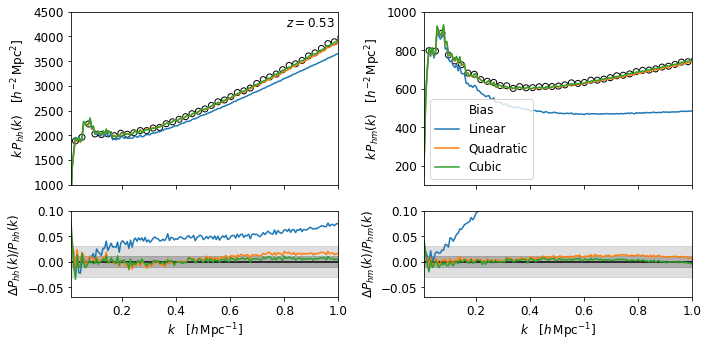

In [4]:
fig, axs = plt.subplots(2,2, figsize=(10, 5), sharex=True, gridspec_kw={'height_ratios': [2, 1]})
ds = 4

axs[0][0].plot(k, k*pgg_lin)
axs[0][0].plot(k, k*pgg_quad)
axs[0][0].plot(k, k*pgg_cubic)
axs[0][0].scatter(k[::ds], k[::ds]*(p_hh.real)[::ds], marker='o', facecolors='none', edgecolors='k')
axs[0][0].set_ylim(1e3, 4.5e3)
axs[0][0].set_ylabel(r'$k\,P_{hh}(k)\quad[h^{-2}\,{\rm Mpc}^{2}]$')
axs[0][0].text(0.805, 4.2e3, r'$z=0.53$')

# axs[0][0].set_xscale('log')
axs[0][0].set_xscale('linear')
axs[0][0].set_yscale('log')

axs[0][1].plot(k, k*pgm_lin)
axs[0][1].plot(k, k*pgm_quad)
axs[0][1].plot(k, k*pgm_cubic)
axs[0][1].scatter(k[::ds], k[::ds]*(p_hm.real)[::ds], marker='o', facecolors='none', edgecolors='k')
axs[0][1].set_ylim(1e2, 1e3)
axs[0][1].set_xlim(1e-2, 1)
axs[0][1].set_ylabel(r'$k\,P_{hm}(k)\quad[h^{-2}\,{\rm Mpc}^{2}]$')
axs[0][1].legend(['Linear', 'Quadratic', 'Cubic'], title='Bias', fontsize=12, title_fontsize=12)

axs[1][0].axhline(0, c='k')
axs[1][1].axhline(0, c='k')

axs[0][0].set_xscale('linear')
axs[0][0].set_yscale('linear')


axs[1][0].plot(k[:348], (p_hh.real[:348]-pgg_lin[:348])/p_hh.real[:348])
axs[1][0].plot(k[:348], (p_hh.real[:348]-pgg_quad[:348])/p_hh.real[:348])
axs[1][0].plot(k[:348], (p_hh.real[:348]-pgg_cubic[:348])/p_hh.real[:348])
axs[1][0].fill_between(k, -0.03, 0.03, color='gray', alpha=0.25)
axs[1][0].fill_between(k, -0.01, 0.01, color='gray', alpha=0.5)
axs[1][0].set_xlabel(r'$k\quad[h\,{\rm Mpc}^{-1}]$')
axs[1][0].set_ylabel(r'$\Delta P_{hh}(k)/P_{hh}(k)$')

axs[0][1].set_xscale('linear')
axs[0][1].set_yscale('linear')

axs[1][1].plot(k[:348], (p_hm.real[:348]-pgm_lin[:348])/p_hm.real[:348])
axs[1][1].plot(k[:348], (p_hm.real[:348]-pgm_quad[:348])/p_hm.real[:348])
axs[1][1].plot(k[:348], (p_hm.real[:348]-pgm_cubic[:348])/p_hm.real[:348])
axs[1][1].fill_between(k, -0.03, 0.03, color='gray', alpha=0.25)
axs[1][1].fill_between(k, -0.01, 0.01, color='gray', alpha=0.5)
axs[1][1].set_ylabel(r'$\Delta P_{hm}(k)/P_{hm}(k)$')

axs[1][0].set_ylim(-0.07, 0.1)
axs[1][1].set_ylim(-0.07, 0.1)
axs[1][0].set_yticks([-0.05, 0, 0.05, 0.1])
axs[1][1].set_yticks([-0.05, 0, 0.05, 0.1])
axs[1][1].set_xlabel(r'$k\quad[h\,{\rm Mpc}^{-1}]$')

fig.tight_layout()
fig.savefig('figures/cubic_fit.pdf')
